# Import Library

# Perbedaan VAR dan VARMAX

Titik letak yang membedakan antara VAR dan VARMAX terutama terletak pada tiga aspek berikut:

**Variabel Eksogen:**
VAR hanya menggunakan variabel endogen, yaitu variabel-variabel yang saling mempengaruhi dalam sistem tanpa pengaruh dari luar sistem itu sendiri.
VARMAX, sebaliknya, mendukung penggunaan variabel eksogen, yang berarti dapat memasukkan variabel-variabel luar (faktor eksternal) yang bisa berdampak pada variabel dalam sistem. Contohnya, jika kita ingin memprediksi inflasi menggunakan data konsumsi dan produksi domestik, tetapi juga ingin memasukkan variabel eksternal seperti harga minyak global, maka VARMAX bisa melakukannya.

**Komponen Moving-Average (MA):**
VAR hanya memiliki komponen autoregresif (AR), di mana model ini hanya mempertimbangkan nilai masa lalu dari variabel dalam sistem.
VARMAX menambahkan komponen Moving-Average (MA), yang berarti model juga mempertimbangkan pola residual atau error dari observasi masa lalu. Ini membuat VARMAX bisa lebih responsif terhadap pola-pola kesalahan masa lalu yang berulang, yang kadang memberikan prediksi yang lebih akurat.

**Kesesuaian untuk Data yang Lebih Kompleks:**
VAR cocok untuk data deret waktu di mana pola data sudah bisa dijelaskan dengan hubungan antar variabel dalam sistem tanpa perlu memasukkan faktor luar atau error dari masa lalu.
VARMAX lebih sesuai jika pola data kompleks, misalnya ketika terdapat variabel luar yang perlu diperhitungkan atau pola residual yang signifikan dari masa lalu.
Jadi, secara praktis, perbedaan utamanya adalah dalam struktur data yang bisa digunakan dan komponen tambahan yang bisa memodelkan variabel eksogen serta error dari observasi masa lalu.

In [1]:
import math
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests, adfuller


import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import *

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RAW DATA

In [2]:
df = pd.read_csv('Super_Store_data.csv', encoding='latin', header=0, parse_dates= True)

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [7]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
df.shape

(2121, 21)

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Eksplorasi Data Analisis



Ship Mode paling terbanyak yaitu standard class sebanyak 1248, second class sebanyak 427, first class sebanyak 327, dan same day 119

In [10]:
df["Ship Mode"].value_counts()

,count
Ship Mode,
Standard Class,1248
Second Class,427
First Class,327
Same Day,119


Segment consumer lebih banyak dibanding coorporate dan home office

In [11]:
df["Segment"].value_counts()

,count
Segment,
Consumer,1113
Corporate,646
Home Office,362


Hanya ada satu country yaitu united states

In [12]:
df["Country"].value_counts()

,count
Country,
United States,2121


Terdapat 371 City

In [13]:
df["City"].nunique()

371

Jumlah State bervariasi, California menjadi state terbanyak

In [14]:
print(df['State'].value_counts())
print(df['State'].nunique())

State
California              444
New York                236
Texas                   202
Pennsylvania            125
Illinois                123
Washington              114
Ohio                     93
Florida                  85
Virginia                 52
Colorado                 51
Michigan                 50
Arizona                  49
Tennessee                45
North Carolina           42
Massachusetts            33
Georgia                  32
Wisconsin                32
Kentucky                 30
Maryland                 28
New Jersey               26
Indiana                  23
Oregon                   21
Delaware                 18
Rhode Island             16
Oklahoma                 15
Minnesota                13
Connecticut              13
Louisiana                11
Alabama                  11
Missouri                 11
Mississippi               9
Arkansas                  9
Nevada                    9
Utah                      7
New Hampshire             6
South Carolina

Jumlah region bervariasi

In [15]:
df['Region'].value_counts()

,count
Region,
West,707
East,601
Central,481
South,332


Hanya ada satu category yaitu furniture

In [16]:
df["Category"].value_counts()

,count
Category,
Furniture,2121


Terdapat 4 Sub-Category dengan Furnishing paling banyak yaitu 957

In [17]:
df['Sub-Category'].value_counts()

,count
Sub-Category,
Furnishings,957
Chairs,617
Tables,319
Bookcases,228


Terdapat 380 nama product dengan jumlah setiap product pada periode order saat ini bervariasi

In [18]:
df['Product Name'].value_counts()

,count
Product Name,
KI Adjustable-Height Table,18
Staple-based wall hangings,16
"Situations Contoured Folding Chairs, 4/Set",15
Eldon Wave Desk Accessories,14
"Global Wood Trimmed Manager's Task Chair, Khaki",14
...,...
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
"Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops",1
"Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled",1


Nilai Quantity penjualan berada pada rentang 1 sampai 13

In [19]:
print(df['Quantity'].value_counts())
print(df['Quantity'].nunique())

Quantity
3     534
2     503
5     253
4     247
1     193
6     121
7     115
9      58
8      58
10     12
14      8
11      8
12      6
13      5
Name: count, dtype: int64
14


Discount 0.00 sampai dengan 0.60 menjadi diskon paling banyak digunakan

In [20]:
print(df['Discount'].value_counts())
print(df['Discount'].nunique())

Discount
0.00    836
0.20    615
0.30    222
0.60    138
0.10     76
0.40     75
0.50     54
0.15     52
0.32     27
0.70     15
0.45     11
Name: count, dtype: int64
11


In [21]:
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2121 entries, 0 to 2120
Series name: Order Date
Non-Null Count  Dtype 
--------------  ----- 
2121 non-null   object
dtypes: object(1)
memory usage: 16.7+ KB


In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2121 entries, 0 to 2120
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
2121 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.7 KB


In [23]:
#sort by date
df.sort_values(by='Order Date', inplace=True)
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1577,7475,CA-2014-167199,2014-01-06,1/10/2014,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.00,746.4078
1626,7661,CA-2014-105417,2014-01-07,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.60,-53.7096
181,867,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.00,21.2954
150,717,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.00,3.0814
631,2979,CA-2014-109232,2014-01-13,1/16/2014,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.00,87.3504
1024,4939,CA-2014-157147,2014-01-13,1/18/2014,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,San Francisco,...,94109,West,FUR-BO-10003034,Furniture,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",333.999,3,0.15,3.9294
1355,6475,CA-2014-149524,2014-01-14,1/15/2014,First Class,BS-11590,Brendan Sweed,Corporate,United States,Philadelphia,...,19140,East,FUR-BO-10003433,Furniture,Bookcases,Sauder Cornerstone Collection Library,61.960,4,0.50,-53.2856
200,971,CA-2014-115791,2014-01-16,1/18/2014,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Philadelphia,...,19134,East,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,127.104,6,0.20,28.5984
1131,5466,CA-2014-146591,2014-01-19,1/20/2014,First Class,TS-21340,Toby Swindell,Consumer,United States,Scottsdale,...,85254,West,FUR-BO-10001972,Furniture,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,181.470,5,0.70,-320.5970
1326,6328,CA-2014-167927,2014-01-20,1/26/2014,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,...,48185,Central,FUR-FU-10002918,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,272.940,3,0.00,30.0234


In [24]:
df.set_index('Order Date', inplace=True)

In [25]:
data = df.drop(labels = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
                         'Postal Code', 'Product ID', 'Category','Product Name'], axis = 1, inplace = True)
df.shape

(2121, 6)

In [26]:
df.head(10)

,Region,Sub-Category,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-06,South,Chairs,2573.820,9,0.00,746.4078
2014-01-07,Central,Furnishings,76.728,3,0.60,-53.7096
2014-01-10,South,Furnishings,51.940,1,0.00,21.2954
2014-01-11,East,Furnishings,9.940,2,0.00,3.0814
2014-01-13,South,Chairs,545.940,6,0.00,87.3504
2014-01-13,West,Bookcases,333.999,3,0.15,3.9294
2014-01-14,East,Bookcases,61.960,4,0.50,-53.2856
2014-01-16,East,Furnishings,127.104,6,0.20,28.5984
2014-01-19,West,Bookcases,181.470,5,0.70,-320.5970


<Axes: xlabel='Order Date'>

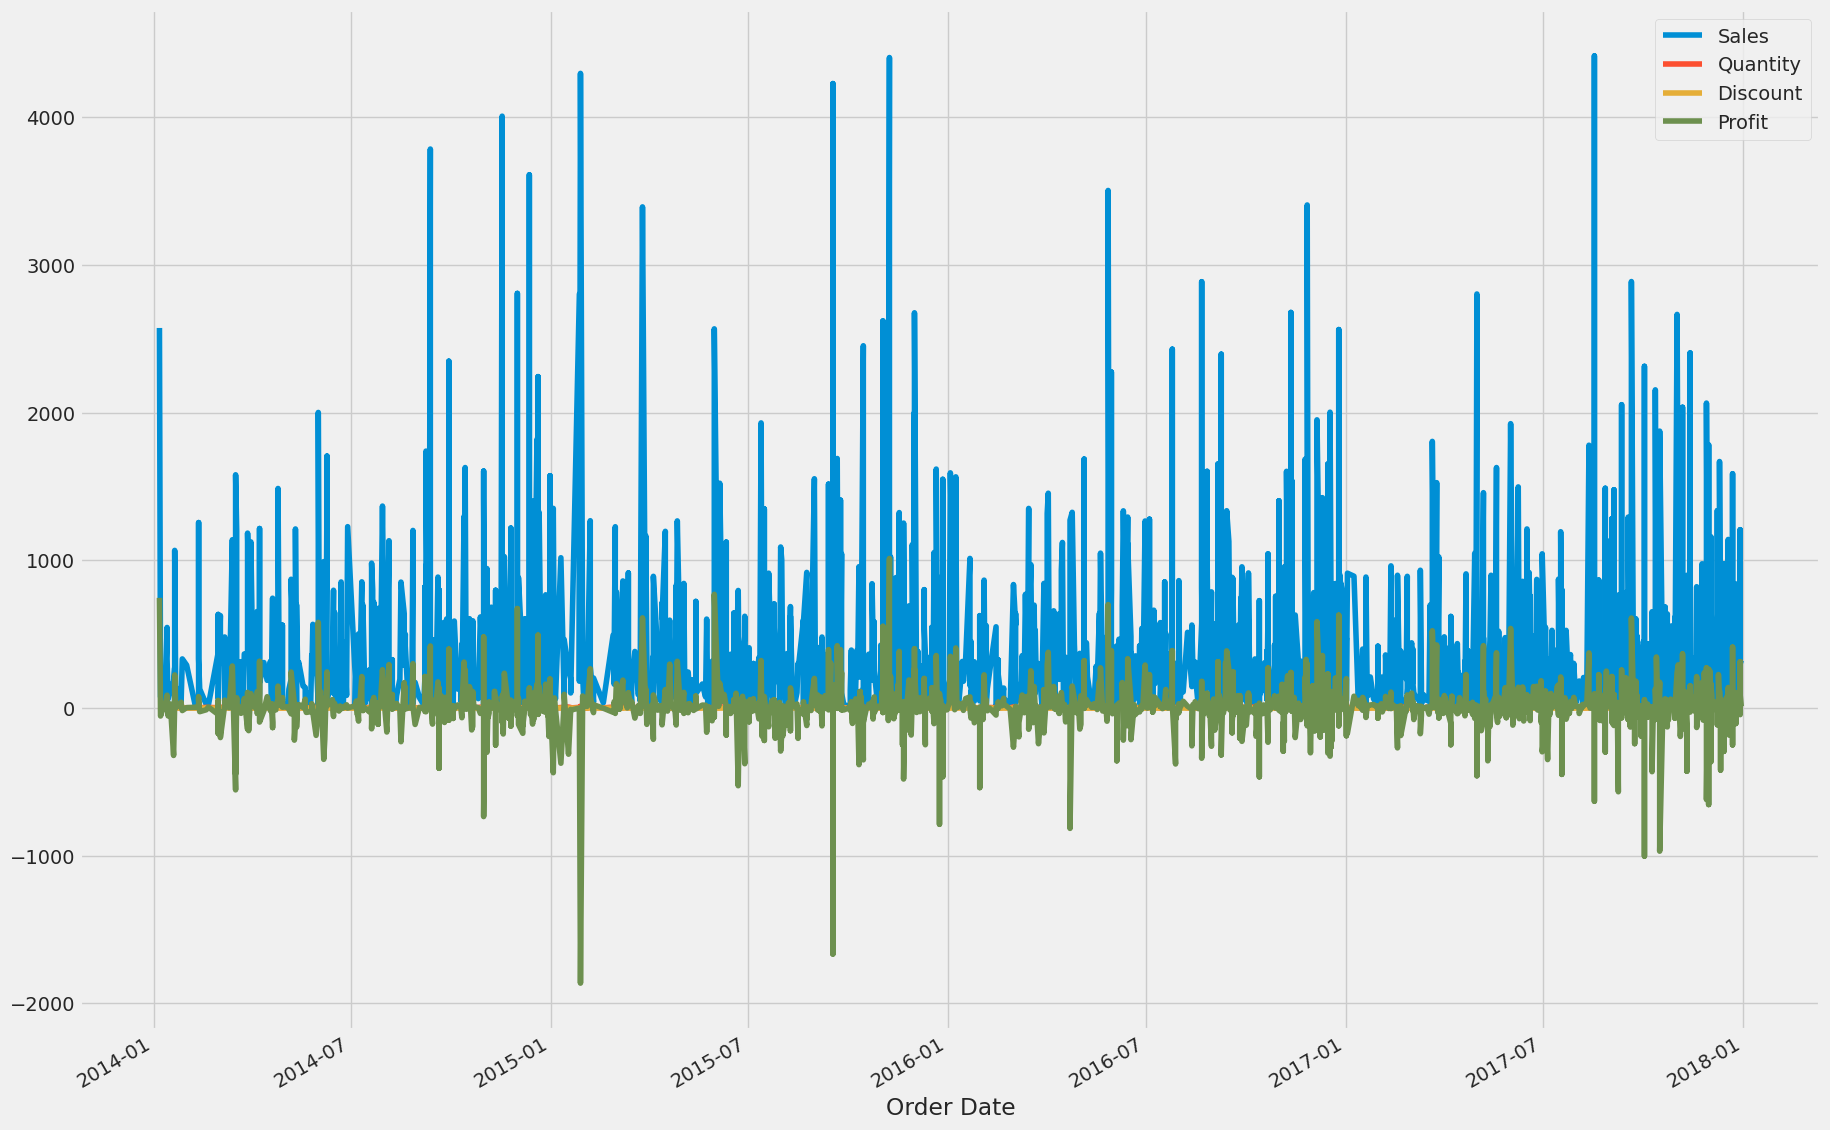

In [27]:
df.plot(figsize = (20, 15))

# Check stationary di setiap kolom

Berdasarkan grafik yang ditampilkan, data sales tidak stasioner. Beberapa alasan untuk menyimpulkan hal ini:

Tren menurun: Grafik menunjukkan tren menurun yang jelas dari tahun 2015 hingga 2017. Nilai pada sumbu y turun dari sekitar 380 menjadi sekitar 320 selama periode tersebut.

Perubahan pola: Terdapat perubahan pola yang signifikan. Dari 2014 ke 2015 ada sedikit kenaikan, kemudian terjadi penurunan tajam setelah 2015.

Variasi mean: Mean (rata-rata) dari data ini berubah seiring waktu, yang merupakan indikasi ketidakstasioneran.

Tidak ada fluktuasi konstan: Dalam data stasioner, fluktuasi biasanya konstan di sekitar nilai mean yang tetap. Di sini, kita melihat perubahan yang konsisten dan terarah.

<ipython-input-28-28831ad70b2a>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Y_Sales = df['Sales'].resample('Y').mean()


<Axes: xlabel='Order Date'>

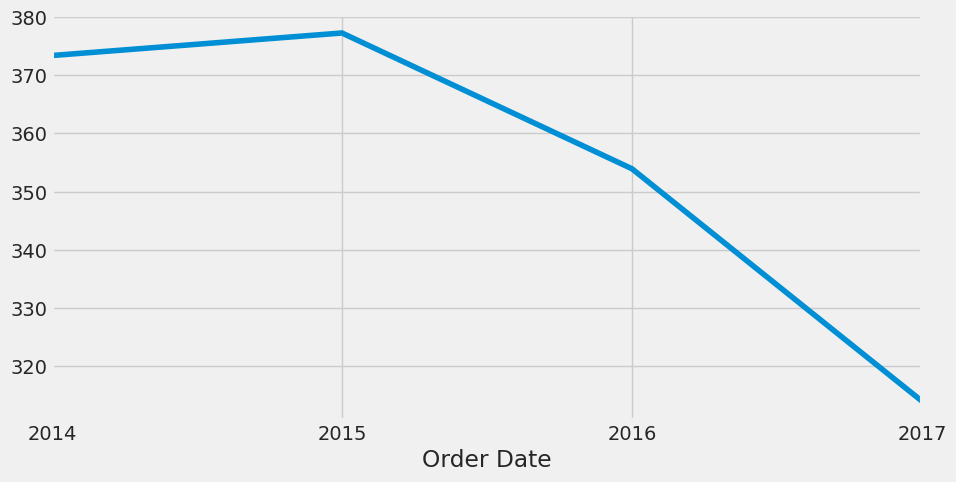

In [28]:
Y_Sales = df['Sales'].resample('Y').mean()

Y_Sales.plot(figsize =(10, 5))

Berdasarkan grafik yang ditampilkan, data ini tidak stasioner untuk kolom profit. Beberapa alasan untuk menyimpulkan hal ini:

Fluktuasi yang tidak konsisten: Grafik menunjukkan perubahan yang sangat signifikan dari tahun ke tahun. Terdapat penurunan tajam dari 2014 ke 2015, diikuti oleh kenaikan drastis dari 2015 ke 2016, dan kemudian penurunan lagi dari 2016 ke 2017.

Tidak ada mean yang konstan: Dalam data stasioner, kita mengharapkan fluktuasi di sekitar nilai rata-rata yang relatif konstan. Namun, di sini kita melihat perubahan yang ekstrem dalam nilai profit dari tahun ke tahun.
Variasi yang tidak konstan: Besarnya perubahan antar tahun sangat bervariasi, yang menunjukkan bahwa varians data tidak konstan sepanjang waktu.

Tidak ada pola yang berulang: Data stasioner seringkali menunjukkan pola yang berulang atau konsisten. Grafik ini tidak menunjukkan pola yang dapat diprediksi atau berulang.
Tren jangka panjang: Meskipun ada fluktuasi naik-turun yang ekstrem, tampaknya ada tren penurunan secara keseluruhan dari 2014 ke 2017.

<ipython-input-29-e4cd3bc71400>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Y_Profit = df['Profit'].resample('Y').mean()


<Axes: xlabel='Order Date'>

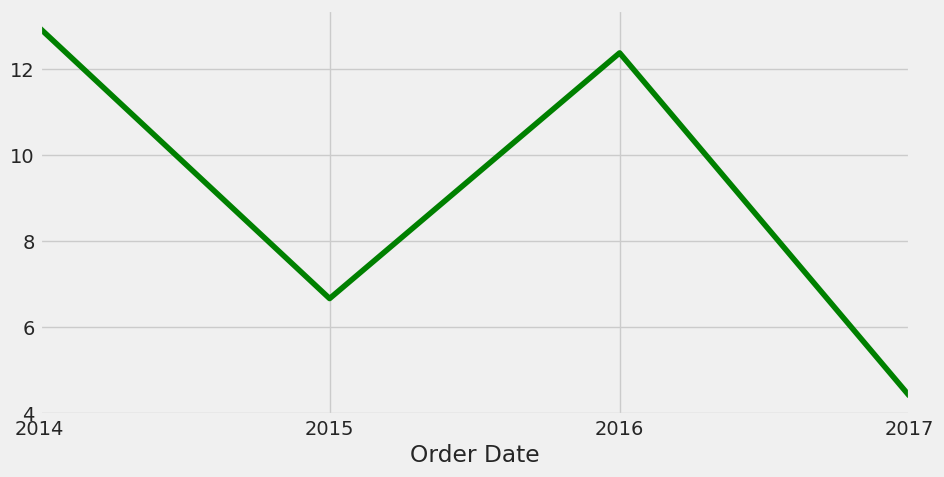

In [29]:
Y_Profit = df['Profit'].resample('Y').mean()

Y_Profit.plot(figsize =(10, 5), c= "g")

Berdasarkan grafik yang ditampilkan, data ini tidak stasioner untuk kolom quantity. Beberapa alasan untuk menyimpulkan hal ini:

Tren yang jelas: Grafik menunjukkan tren yang berubah dari waktu ke waktu. Ada kenaikan dari 2014 ke 2015, kemudian penurunan tajam dari 2016 ke 2017.

Perubahan mean: Rata-rata (mean) dari data berubah seiring waktu. Tidak ada nilai tengah yang konstan di mana data berfluktuasi.

Variasi yang tidak konsisten: Besarnya perubahan antar tahun tidak konsisten. Ada periode stabilitas relatif (2015-2016) diikuti oleh perubahan yang lebih drastis.

Pola yang tidak berulang: Tidak ada pola yang berulang atau musiman yang jelas terlihat dalam rentang waktu ini.
Perubahan kemiringan: Kemiringan garis berubah secara signifikan, terutama setelah 2016, menunjukkan perubahan dalam karakteristik dasar data.

<ipython-input-30-c2fbac361d29>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Y_Quantity = df['Quantity'].resample('Y').mean()


<Axes: xlabel='Order Date'>

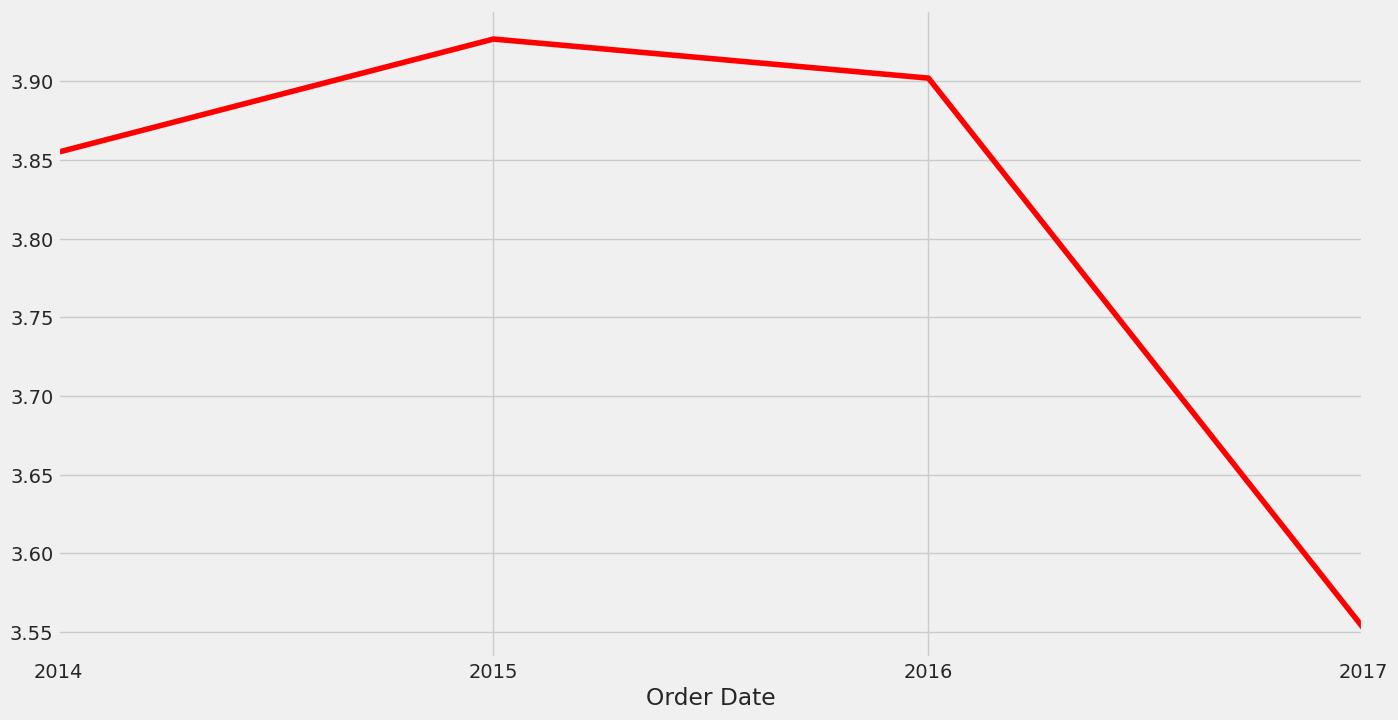

In [30]:
Y_Quantity = df['Quantity'].resample('Y').mean()

Y_Quantity.plot(figsize =(15, 8), c ="r")

<ipython-input-31-108a6bcabbd6>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Y_Discount = df['Discount'].resample('Y').mean()


<Axes: xlabel='Order Date'>

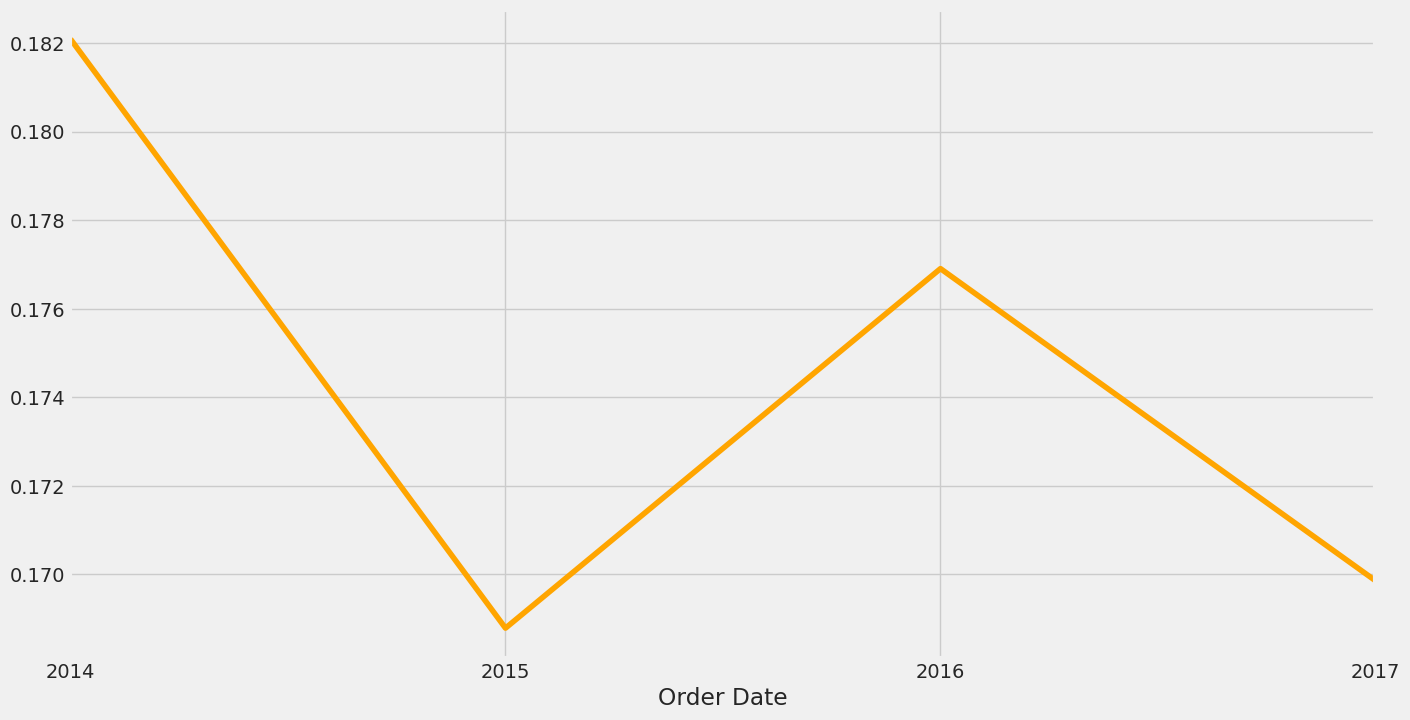

In [31]:
# Resample the data to compute annual average of the 'Discount' column
Y_Discount = df['Discount'].resample('Y').mean()

Y_Discount.plot(figsize =(15, 8), c ="orange", )

Grafik ini menunjukkan tren penjualan (sales) dan keuntungan (profit) dari sebuah toko furnitur dari tahun 2014 hingga 2017. Berikut adalah interpretasi utama dari grafik tersebut:

Penjualan (Sales):

Ditunjukkan oleh garis biru
Menunjukkan tren penurunan yang konsisten dari 2014 hingga 2017
Penurunan terlihat lebih curam setelah tahun 2016


Keuntungan (Profit):

Ditunjukkan oleh garis hijau
Relatif stabil dengan sedikit fluktuasi
Terjadi sedikit peningkatan dari 2015 ke 2016, kemudian sedikit menurun menuju 2017


Perbandingan:

Penjualan jauh lebih tinggi dibandingkan keuntungan
Meskipun penjualan menurun, keuntungan tetap relatif stabil


Implikasi bisnis:

Toko mungkin menghadapi tantangan dalam mempertahankan volume penjualan
Namun, mereka berhasil mempertahankan tingkat keuntungan yang relatif stabil meskipun penjualan menurun
Ini bisa mengindikasikan peningkatan efisiensi operasional, pengurangan biaya, atau fokus pada produk dengan margin yang lebih tinggi


Tren keseluruhan:

Bisnis mengalami penurunan penjualan tetapi berhasil mempertahankan profitabilitasnya



Grafik ini memberikan gambaran tentang kinerja finansial toko furnitur tersebut, menunjukkan bahwa meskipun menghadapi penurunan penjualan, toko ini mampu mempertahankan tingkat keuntungan yang relatif stabil.

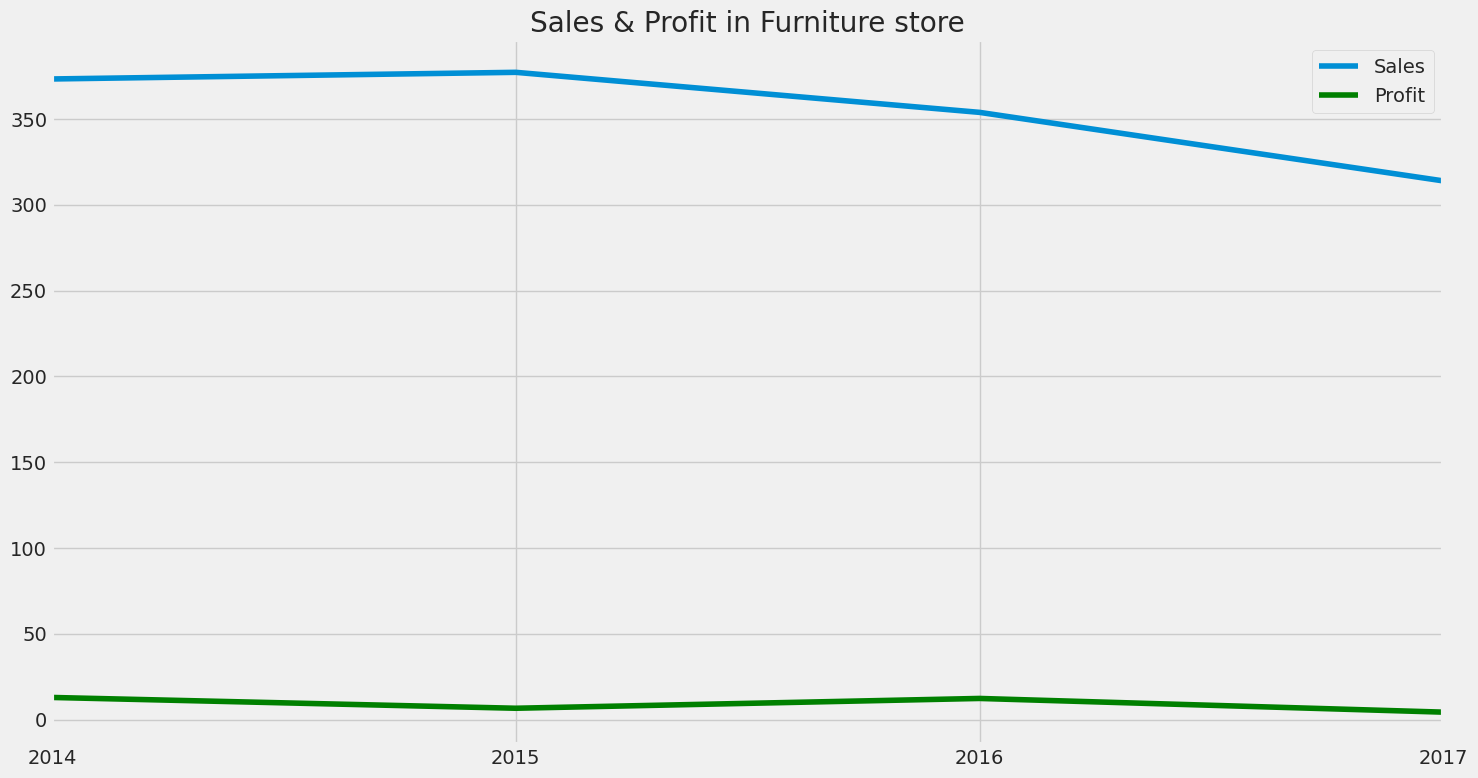

In [32]:
plt.figure(figsize=(15, 8))
Y_Sales.plot()
Y_Profit.plot(c = 'g')
plt.ylabel(None)
plt.xlabel(None)
plt.title("Sales & Profit in Furniture store")
plt.legend(['Sales', 'Profit'])
plt.tight_layout()
plt.show()

Grafik ini menunjukkan tren penjualan (sales) dan diskon di sebuah toko furnitur dari tahun 2014 hingga 2017. Berikut interpretasi utama dari grafik tersebut:

Penjualan (Sales):

Ditunjukkan oleh garis biru
Menunjukkan tren penurunan yang konsisten dari 2014 hingga 2017
Penurunan terlihat lebih curam setelah tahun 2016
Nilai penjualan berada di kisaran 300-380 unit (atau mungkin dalam ribuan dollar, tergantung pada unit yang digunakan)


Diskon:

Ditunjukkan oleh garis oranye
Terlihat sangat rendah dan konstan sepanjang periode 2014-2017
Nilainya mendekati nol dan tidak menunjukkan perubahan yang signifikan


Perbandingan:

Penjualan jauh lebih tinggi dibandingkan diskon
Meskipun penjualan menurun, tingkat diskon tetap konsisten dan sangat rendah


Implikasi bisnis:

Toko mengalami penurunan penjualan yang signifikan selama periode ini
Strategi diskon tidak berubah meskipun penjualan menurun, yang mungkin menunjukkan bahwa toko tidak menggunakan diskon sebagai strategi untuk meningkatkan penjualan


Tren keseluruhan:

Bisnis mengalami penurunan penjualan yang konsisten
Kebijakan diskon sangat konsisten dan minimal



Grafik ini memberikan gambaran bahwa toko furnitur tersebut mengalami penurunan penjualan yang cukup signifikan selama periode 4 tahun, namun tidak mengubah strategi diskonnya. Ini bisa mengindikasikan beberapa kemungkinan, seperti fokus pada margin keuntungan, ketidakmampuan untuk menurunkan harga, atau mungkin faktor eksternal yang mempengaruhi industri furnitur secara keseluruhan.

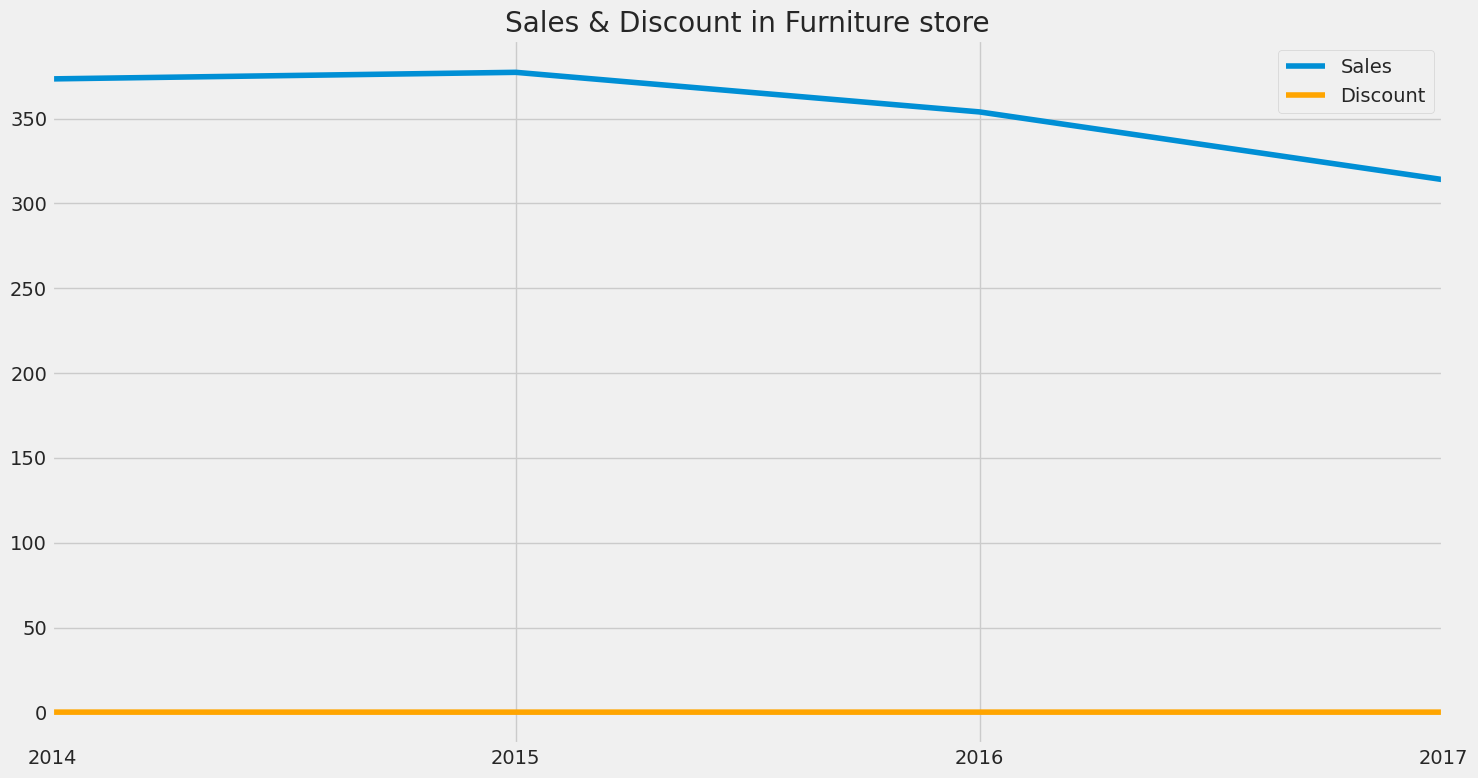

In [33]:
plt.figure(figsize=(15, 8))
Y_Sales.plot()
Y_Discount.plot(c = 'orange')
plt.ylabel(None)
plt.xlabel(None)
plt.title("Sales & Discount in Furniture store")
plt.legend(['Sales', 'Discount'])
plt.tight_layout()
plt.show()


Grafik ini menunjukkan tren penjualan (sales) dan kuantitas (quantity) di sebuah toko furnitur dari tahun 2014 hingga 2017. Berikut interpretasi utama dari grafik tersebut:

Penjualan (Sales):
Ditunjukkan oleh garis biru
Menunjukkan tren penurunan yang konsisten dari 2014 hingga 2017
Penurunan terlihat lebih curam setelah tahun 2016
Nilai penjualan berada di kisaran 300-380 unit (kemungkinan dalam ribuan dollar atau unit moneter lainnya)

Kuantitas:
Ditunjukkan oleh garis merah
Terlihat sangat rendah dan konstan sepanjang periode 2014-2017
Nilainya mendekati nol dan tidak menunjukkan perubahan yang signifikan

Perbandingan:
Nilai penjualan jauh lebih tinggi dibandingkan kuantitas
Meskipun penjualan menurun, kuantitas tetap konsisten dan sangat rendah

Implikasi bisnis:
Penurunan nilai penjualan tidak diikuti oleh penurunan kuantitas yang signifikan
Ini bisa mengindikasikan bahwa harga per unit furnitur menurun, atau toko menjual lebih banyak item dengan harga lebih rendah

Anomali data:
Ada kemungkinan kesalahan dalam pengukuran atau pelaporan kuantitas, mengingat nilainya yang sangat rendah dan tidak berubah

Tren keseluruhan:
Bisnis mengalami penurunan nilai penjualan yang konsisten
Kuantitas penjualan tetap sangat rendah dan stabil, yang tidak biasa mengingat penurunan nilai penjualan
Grafik ini menimbulkan beberapa pertanyaan tentang akurasi data kuantitas atau bagaimana "kuantitas" didefinisikan dalam konteks ini. Jika data akurat, ini bisa menunjukkan bahwa toko mungkin menjual sedikit item dengan nilai tinggi, dan nilai per item menurun seiring waktu. Namun, interpretasi ini perlu ditinjau lebih lanjut mengingat ketidaksesuaian yang terlihat antara tren penjualan dan kuantitas.



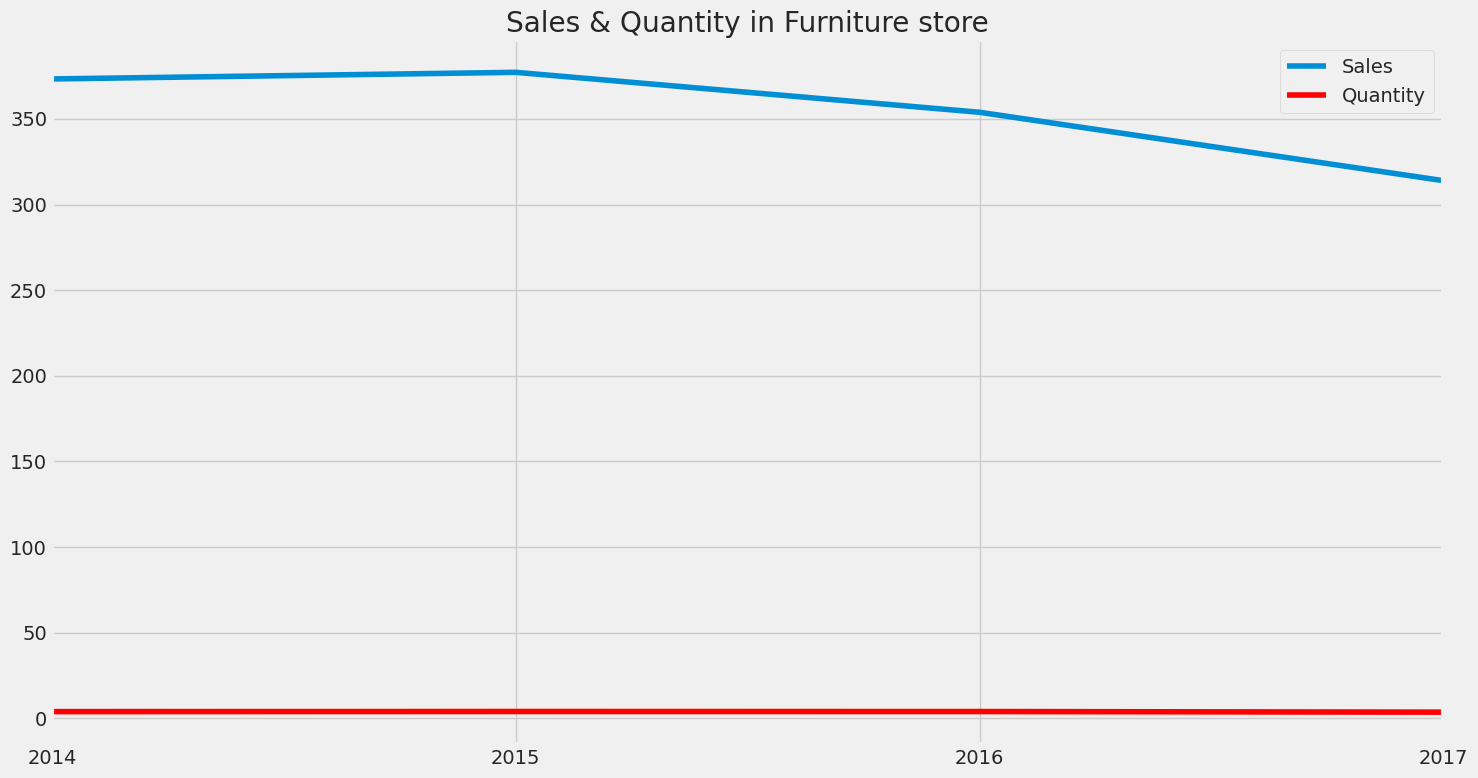

In [34]:
plt.figure(figsize=(15, 8))
Y_Sales.plot()
Y_Quantity.plot(c = 'r')
plt.ylabel(None)
plt.xlabel(None)
plt.title("Sales & Quantity in Furniture store")
plt.legend(['Sales', 'Quantity'])
plt.tight_layout()
plt.show()

In [35]:
print(df.columns)

Index(['Region', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


# 7 Data Preprocessing and Statistiacl test (Sationary, causality)


# Encoding Categorial Columns

In [36]:
encoder = LabelEncoder()

df['Region'] = encoder.fit_transform(df['Region'])
df['Sub-Category'] = encoder.fit_transform(df['Sub-Category'])
df.head(10)

,Region,Sub-Category,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-06,2,1,2573.820,9,0.00,746.4078
2014-01-07,0,2,76.728,3,0.60,-53.7096
2014-01-10,2,2,51.940,1,0.00,21.2954
2014-01-11,1,2,9.940,2,0.00,3.0814
2014-01-13,2,1,545.940,6,0.00,87.3504
2014-01-13,3,0,333.999,3,0.15,3.9294
2014-01-14,1,0,61.960,4,0.50,-53.2856
2014-01-16,1,2,127.104,6,0.20,28.5984
2014-01-19,3,0,181.470,5,0.70,-320.5970


# Split Train, Test

In [37]:
target = df[['Region', 'Sub-Category','Quantity','Discount','Profit','Sales']]
data = pd.DataFrame(target)
train =data.iloc[:-400]
test = data.iloc[-400: ]
print(f"Lenght of train: {len(train)}\n\n Length of test: {len(test)}")

Lenght of train: 1721

 Length of test: 400


# Convert dataframe ke list

In [38]:
train = train.values.tolist()
test = test.values.tolist()

# Check Stasionary

In [39]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(result, column_name):
    p_value = result[1]
    if p_value < 0.05:
        conclusion = "stasioner"
    else:
        conclusion = "tidak stasioner"
    print(f'{column_name}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print(f'Kesimpulan: Data {conclusion}')
    print('\n---------------------\n')

# Sales
ad_fuller_result_1 = adfuller(df['Sales'].diff().dropna())
check_stationarity(ad_fuller_result_1, 'Sales')

# Profit
ad_fuller_result_2 = adfuller(df['Profit'].diff().dropna())
check_stationarity(ad_fuller_result_2, 'Profit')

# Discount
ad_fuller_result_3 = adfuller(df['Discount'].diff().dropna())
check_stationarity(ad_fuller_result_3, 'Discount')

# Quantity
ad_fuller_result_4 = adfuller(df['Quantity'].diff().dropna())
check_stationarity(ad_fuller_result_4, 'Quantity')

Sales
ADF Statistic: -16.022447534713418
p-value: 6.18309402436574e-29
Kesimpulan: Data stasioner

---------------------

Profit
ADF Statistic: -15.531756340003035
p-value: 2.2158863016938525e-28
Kesimpulan: Data stasioner

---------------------

Discount
ADF Statistic: -16.481155898108092
p-value: 2.236534254448457e-29
Kesimpulan: Data stasioner

---------------------

Quantity
ADF Statistic: -16.0070039221374
p-value: 6.417627533340235e-29
Kesimpulan: Data stasioner

---------------------



Note:

Sebagai contoh, dalam konteks analisis pengaruh Discount terhadap Profit:

Discount dapat dianggap sebagai variabel eksogen jika kita yakin bahwa nilai diskon tidak dipengaruhi oleh profit yang dihasilkan. Dalam hal ini, diskon diberikan oleh kebijakan pemasaran yang tidak bergantung pada profit yang akan diperoleh.

Profit, dalam contoh ini, adalah variabel endogen yang nilainya dipengaruhi oleh diskon, sehingga tergantung pada variabel lain dalam model.
Singkatnya:

Variabel Eksogen: variabel bebas, tidak dipengaruhi oleh sistem atau model, tetapi memengaruhi variabel lain.

# Check Causalaty

Pengujian Granger Causality dapat digunakan untuk mengevaluasi apakah satu variabel mendahului atau memiliki hubungan kausal terhadap variabel lainnya dalam rangka membantu memutuskan variabel eksogen dalam model. Hasil dari pengujian ini memberi indikasi apakah perubahan dalam satu variabel (misalnya, Discount) dapat memprediksi perubahan dalam variabel lain (misalnya, Profit).

Hasil Cek causalaty:
Nilai p-value yang tinggi dalam setiap pengujian Granger menunjukkan bahwa tidak ada bukti signifikan untuk mengklaim bahwa Discount menyebabkan perubahan pada Profit atau sebaliknya. Artinya, kedua variabel tidak memiliki hubungan kausal yang kuat dalam hal prediksi jangka pendek.
Berdasarkan hasil ini, Discount dapat dianggap sebagai variabel eksogen dalam model Anda, karena kita tidak menemukan bukti bahwa Profit memengaruhi atau mendahului Discount

In [40]:
#cek causalaty antara discount dan profit
print('Discount causes Profit?\n')
print('------------------')
granger_1 = grangercausalitytests(df[['Discount', 'Profit']], 4)

print('\Profit causes Discount?\n')
print('------------------')
granger_2 = grangercausalitytests(df[['Profit', 'Discount']], 4)

Discount causes Profit?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1906  , p=0.6625  , df_denom=2117, df_num=1
ssr based chi2 test:   chi2=0.1908  , p=0.6622  , df=1
likelihood ratio test: chi2=0.1908  , p=0.6622  , df=1
parameter F test:         F=0.1906  , p=0.6625  , df_denom=2117, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8764  , p=0.4164  , df_denom=2114, df_num=2
ssr based chi2 test:   chi2=1.7569  , p=0.4154  , df=2
likelihood ratio test: chi2=1.7562  , p=0.4156  , df=2
parameter F test:         F=0.8764  , p=0.4164  , df_denom=2114, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5250  , p=0.6651  , df_denom=2111, df_num=3
ssr based chi2 test:   chi2=1.5803  , p=0.6639  , df=3
likelihood ratio test: chi2=1.5797  , p=0.6640  , df=3
parameter F test:         F=0.5250  , p=0.6651  , df_denom=2111, df_num=3

Granger Causality
number of lags (no zero) 

In [41]:
import pandas as pd
import statsmodels.api as sm

# Asumsikan 'data' adalah DataFrame Anda yang berisi kolom 'Profit', 'Discount', 'Sales', dan 'Quantity'

# Menyusun variabel independen
X = data[['Discount', 'Sales', 'Quantity']]
# Menambahkan kolom konstanta untuk intercept dalam model
X = sm.add_constant(X)

# Menyusun variabel dependen
y = data['Profit']

# Membuat dan melatih model regresi linear
model = sm.OLS(y, X).fit()

# Melihat hasil summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     247.8
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          8.52e-138
Time:                        06:43:38   Log-Likelihood:                -13110.
No. Observations:                2121   AIC:                         2.623e+04
Df Residuals:                    2117   BIC:                         2.625e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8061      5.570     10.736      0.0

1. **R-squared**:
   - Nilai **R-squared** sebesar **0.260** menunjukkan bahwa sekitar 26% variasi dalam **Profit** dapat dijelaskan oleh variabel independen (**Discount**, **Sales**, dan **Quantity**) yang Anda masukkan ke dalam model. Ini berarti bahwa ada sekitar 74% variasi dalam **Profit** yang belum dapat dijelaskan oleh model ini.

2. **Koefisien**:
   - **Discount**: Koefisien sebesar **-359.1559** menunjukkan bahwa untuk setiap peningkatan satu unit dalam **Discount**, **Profit** diperkirakan akan berkurang sekitar **359.16** unit, yang berarti hubungan negatif dan signifikan (p-value < 0.001).
   - **Sales**: Koefisien sebesar **0.0456** menunjukkan bahwa untuk setiap peningkatan satu unit dalam **Sales**, **Profit** diperkirakan akan meningkat sekitar **0.0456** unit. Ini juga menunjukkan hubungan positif dan signifikan (p-value < 0.001).
   - **Quantity**: Koefisien sebesar **-1.2122** menunjukkan bahwa untuk setiap peningkatan satu unit dalam **Quantity**, **Profit** diperkirakan akan berkurang sekitar **1.2122** unit. Namun, ini tidak signifikan (p-value = 0.335), yang menunjukkan bahwa **Quantity** mungkin tidak berkontribusi secara signifikan terhadap model.

3. **Statistik F**:
   - F-statistik sebesar **247.8** dengan p-value **8.52e-138** menunjukkan bahwa model secara keseluruhan signifikan, yang berarti setidaknya satu dari variabel independen berkontribusi secara signifikan dalam menjelaskan variasi **Profit**.

 **Discount** dan **Sales** memiliki pengaruh signifikan terhadap **Profit**, tetapi **Quantity** tidak menunjukkan hubungan signifikan dalam model ini.

1- Data tidak stasioner

2- Setiap fitur mewakili musim yang berbeda dengan kebisingan, sehingga setiap komponen dapat dipertimbangkan

3- Banyak metode statistik yang dapat digunakan. misal: untuk mendapatkan nilai p untuk memastikan apakah data stasioner atau tidak

4- Jika nilai p >= 0,05, Data tidak stasioner

5-Data mewakili deret waktu multivariat

Secara default: di VARMAX (menerapkan stasioner= Benar)

# CREATE MODEL

# A. Model Training

In [42]:
model = VARMAX(train, order=(1,1,1,1,1,1))# Define the order of the VARMAX model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


# B Getting Prediction

In [43]:
result = model.fit(disp=False)
result

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# C. Forecast


In [44]:
# Forecast
forecast = result.forecast(steps=365)## A  VARMAX model
len(forecast)

365

# D. Convert numpy array to series

In [46]:
Forecasted = pd.DataFrame(forecast)
Forecasted

,0,1,2,3,4,5
0,1.676966,1.516507,3.749055,0.178494,10.842622,338.939910
1,1.586620,1.623126,3.830449,0.176681,10.077480,355.017611
2,1.578911,1.631630,3.824305,0.175688,10.110925,353.038416
3,1.578226,1.632163,3.822957,0.175557,10.144926,352.656074
4,1.578160,1.632190,3.822795,0.175545,10.150578,352.614109
...,...,...,...,...,...,...
360,1.578152,1.632191,3.822777,0.175543,10.151280,352.610015
361,1.578152,1.632191,3.822777,0.175543,10.151280,352.610015
362,1.578152,1.632191,3.822777,0.175543,10.151280,352.610015
363,1.578152,1.632191,3.822777,0.175543,10.151280,352.610015


In [47]:
# Rename columns of the forecast DataFrame
Forecasted.columns = ['Region', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']
Forecasted.head()

,Region,Sub-Category,Sales,Quantity,Discount,Profit
0,1.676966,1.516507,3.749055,0.178494,10.842622,338.939910
1,1.586620,1.623126,3.830449,0.176681,10.077480,355.017611
2,1.578911,1.631630,3.824305,0.175688,10.110925,353.038416
3,1.578226,1.632163,3.822957,0.175557,10.144926,352.656074
4,1.578160,1.632190,3.822795,0.175545,10.150578,352.614109


from matplotlib import pyplot as plt
_df_0['Region'].plot(kind='hist', bins=20, title='Region')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Sub-Category'].plot(kind='hist', bins=20, title='Sub-Category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Region', y='Sub-Category', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Sub-Category', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Sales', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Quantity', y='Discount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sub-Category']
  ys = series['Region']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Sub-Category', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sub-Category')
_ = plt.ylabel('Region')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sub-Category']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Sub-Category', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sub-Category')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sub-Category']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Sub-Category', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sub-Category')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sub-Category']
  ys = series['Discount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Sub-Category', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sub-Category')
_ = plt.ylabel('Discount')

from matplotlib import pyplot as plt
_df_12['Region'].plot(kind='line', figsize=(8, 4), title='Region')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Sub-Category'].plot(kind='line', figsize=(8, 4), title='Sub-Category')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

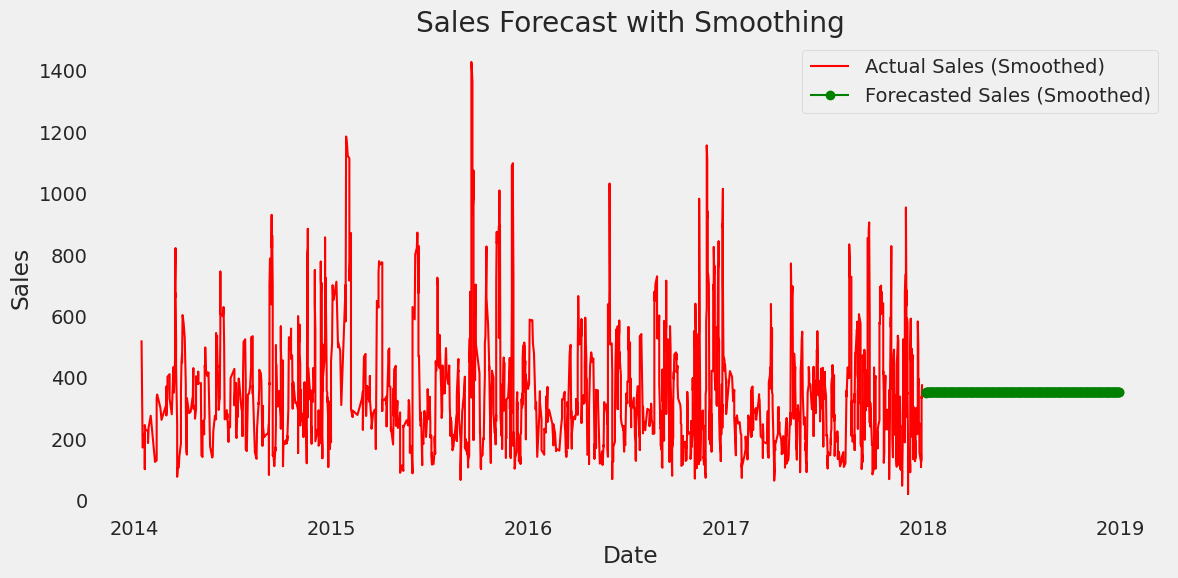

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi hasil forecast ke DataFrame jika belum dilakukan
Forecasted = pd.DataFrame(forecast)
Forecasted.columns = ['Region', 'Sub-Category', 'Quantity', 'Discount', 'Profit', 'Sales']

# Set the index to be sequentially after the last date in the training data
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=365, freq='D')
Forecasted.index = forecast_index

# Menggunakan rolling mean untuk smoothing
rolling_window = 7  # ukuran jendela untuk rolling mean
actual_sales_smoothed = df['Sales'].rolling(window=rolling_window).mean().dropna()
forecasted_sales_smoothed = Forecasted['Sales'].rolling(window=rolling_window).mean()

# Grafik hasil forecasting untuk kolom Sales
plt.figure(figsize=(12, 6))
plt.plot(actual_sales_smoothed.index, actual_sales_smoothed, color='red', label='Actual Sales (Smoothed)', linewidth=1.5)
plt.plot(Forecasted.index, forecasted_sales_smoothed, color='green', marker='o', linestyle='-', label='Forecasted Sales (Smoothed)', linewidth=1.5)

plt.title('Sales Forecast with Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Kesimpulan, Mengapa menggunakan VARMAX?

Penanganan Data Tidak Stasioner: VARMAX mendukung data non-stasioner dengan parameter stationary=True, yang memastikan model dapat mengatasi tren atau musiman dalam data secara otomatis, tanpa perlu banyak preprocessing tambahan dari pihak Anda.

Kemampuan Menangani Musiman yang Berbeda pada Tiap Fitur: VARMAX dapat menangkap dinamika antar variabel, bahkan ketika tiap variabel memiliki pola musiman atau volatilitas yang berbeda. Ini berguna untuk data multivariat seperti Sales, Profit, dan Quantity yang mungkin memiliki pola yang berbeda sepanjang tahun atau siklus tertentu.

Pengujian Stasioneritas untuk Validasi: Anda juga bisa menggunakan pengujian stasioneritas, seperti ADF atau KPSS, untuk memastikan data telah diubah menjadi stasioner. Dengan begitu, Anda akan lebih yakin apakah model VARMAX dapat bekerja optimal.

Data Time Series Multivariat dengan Variabel Eksogen: Dengan data multivariat yang berisi variabel eksogen (seperti Discount), VARMAX unggul karena memungkinkan variabel eksternal yang tidak berpengaruh balik pada variabel lain, tetapi tetap berdampak pada variabel output (misalnya, dampak diskon terhadap Sales atau Profit).

Kesimpulan
Secara keseluruhan, VARMAX tepat untuk kebutuhan Anda karena:

-Dapat menangani data tidak stasioner dengan fitur stationary=True.

-Menyesuaikan dengan pola musiman atau tren yang berbeda pada masing-masing variabel.

-Memungkinkan Anda memasukkan variabel eksogen seperti Discount tanpa pengaruh balik.

# Alasan Tidak Menggunakan VAR:

VAR Tidak Mendukung Variabel Eksogen (Discount): VAR hanya menangani variabel yang saling bergantung (endogen) dan tidak bisa memasukkan variabel eksogen seperti Discount. Jika Discount memiliki pengaruh signifikan terhadap Sales atau Profit, penggunaan VAR tidak optimal karena tidak dapat memodelkan dampaknya dengan baik. Dalam VARMAX, Discount bisa dimasukkan sebagai variabel eksogen, memungkinkan model memanfaatkan hubungan eksternal tanpa umpan balik ke variabel lain.

VAR Sensitif terhadap Data Tidak Stasioner: VAR membutuhkan data yang stasioner, dan tanpa fitur penanganan otomatis seperti yang dimiliki VARMAX. Artinya, jika data tidak stasioner, Anda perlu melakukan transformasi (misalnya, differencing) secara manual sebelum menggunakan VAR. Dalam data dengan tren atau musiman yang kuat, ini bisa menjadi proses tambahan yang rumit.

Tidak Optimal untuk Data dengan Musiman yang Berbeda: Jika masing-masing variabel (misalnya, Sales, Profit, Quantity) memiliki pola musiman yang berbeda, VAR mungkin tidak menangkap dinamika ini secara efektif. VAR cenderung menganggap semua variabel mengikuti pola yang saling terkait tanpa mempertimbangkan pola eksogen yang mungkin lebih mendalam. VARMAX, di sisi lain, menangani musim yang berbeda dengan lebih fleksibel melalui parameterisasi tambahan yang sesuai.

Kurang Efektif dalam Menghadapi Kebisingan pada Beberapa Fitur: Dalam data yang memiliki banyak kebisingan atau pola musiman yang sulit dikendalikan, VAR dapat menghasilkan hasil yang tidak stabil atau kurang akurat, terutama jika kebisingan itu berhubungan dengan variabel eksternal yang tidak dimodelkan.

Kesimpulan
Secara ringkas, VAR kurang cocok digunakan dalam kasus ini karena:

-Tidak dapat memasukkan variabel eksogen seperti Discount.

-Membutuhkan transformasi manual agar data stasioner.

-Kurang fleksibel dalam menangani pola musiman dan kebisingan yang berbeda pada tiap variabel.